In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("C:\\Users\\KIIT\\TESLA.csv")

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [15]:
dataset['Date'] = pd.to_datetime(dataset.Date)
dataset['Date'].head()

0   2021-09-29
1   2021-09-30
2   2021-10-01
3   2021-10-04
4   2021-10-05
Name: Date, dtype: datetime64[ns]

In [5]:
dataset.shape

(253, 7)

In [6]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
dataset.drop('Adj Close', axis=1, inplace=True)

In [17]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,55297800


In [18]:
dataset.shape

(253, 6)

In [19]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    253 non-null    datetime64[ns]
 1   Open    253 non-null    float64       
 2   High    253 non-null    float64       
 3   Low     253 non-null    float64       
 4   Close   253 non-null    float64       
 5   Volume  253 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 12.0 KB


In [21]:
dataset.describe()

,Open,High,Low,Close,Volume
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,300.136008,307.486021,292.114058,299.709104,8.050938e+07
std,46.139272,46.789896,44.685331,45.788283,2.546595e+07
min,207.949997,217.973328,206.856674,209.386673,3.504270e+07
25%,266.513336,273.166656,260.723328,266.923340,6.255570e+07
50%,298.500000,303.709991,289.130005,296.666656,7.695630e+07
75%,335.600006,344.950012,327.510010,336.336670,9.347310e+07
max,411.470001,414.496674,405.666656,409.970001,1.885563e+08


In [22]:
x = dataset[['Open', 'High', 'Low', 'Volume']]
y = dataset['Close']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size = 0.2)

In [25]:
x_train.shape

(202, 4)

In [26]:
x_test.shape

(51, 4)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, r2_score
regressor = LinearRegression()

In [28]:
regressor.fit(x_train,y_train)

LinearRegression()

In [31]:
print(regressor.coef_)
print(regressor.intercept_)

[-7.23495824e-01  8.16234775e-01  9.06971670e-01  2.31336714e-08]
-0.6528753883805507


In [32]:
predicted = regressor.predict(x_test)

In [33]:
predicted.shape

(51,)

In [35]:
dframe = pd.DataFrame(y_test, predicted)

In [36]:
dfr = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
dfr.head()

,Actual,Predicted
67,383.196655,382.983464
252,268.209991,269.141743
213,308.633331,308.614495
243,303.350006,300.591500
91,307.333344,304.681077


In [37]:
regressor.score(x_test, y_test)

0.9885613735045278

<AxesSubplot:>

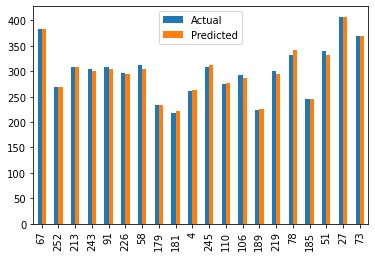

In [42]:
graph = dfr.head(20)
graph.plot(kind='bar')

In [50]:
mse = mean_squared_error(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
r_squared = r2_score(y_test, predicted)

In [51]:
print(f'Mean Squared Error = {mse}')
print(f'Mean Absolute Error = {mae}')
print(f'R-Squared Error = {r_squared}')

Mean Squared Error = 26.62670034610107
Mean Absolute Error = 3.857458684279868
R-Squared Error = 0.9885613735045278
